# Predicting Stock Market With Machine Learning

In [18]:
import os
import pandas as pd
import numpy as np

dataset = dict()

for root, dirs, files in os.walk("Datasets"):
    for file in files:
        if file.endswith(".csv"):
            dataname = file.split('.')[0]
            dataset[dataname] = pd.read_csv(os.path.join(root, file))

dataset['AppleStock_Year1'].head()

,Date,Close,High,Low,Open,Volume,Target
0,2024-01-02,184.290405,187.070052,182.553128,185.789422,82488700,182.910507
1,2024-01-03,182.910507,184.528662,182.096461,182.880727,58414500,180.587524
2,2024-01-04,180.587524,181.758939,179.565014,180.825770,71983600,179.862839
3,2024-01-05,179.862839,181.431354,178.860187,180.666963,62303300,184.210999
4,2024-01-08,184.210999,184.250716,180.180517,180.766224,59144500,183.794052


# Random Forest Model

The Random Forest model will be the next model we will test this with. In my head this should be better and be an improvement to the linear regression model.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

features = dataset['AppleStock_Year1'][['Open', 'High', 'Low', 'Close', 'Volume']]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train_rf, y_train_rf)

random_forest_predictions = random_forest_model.predict(x_test_rf)

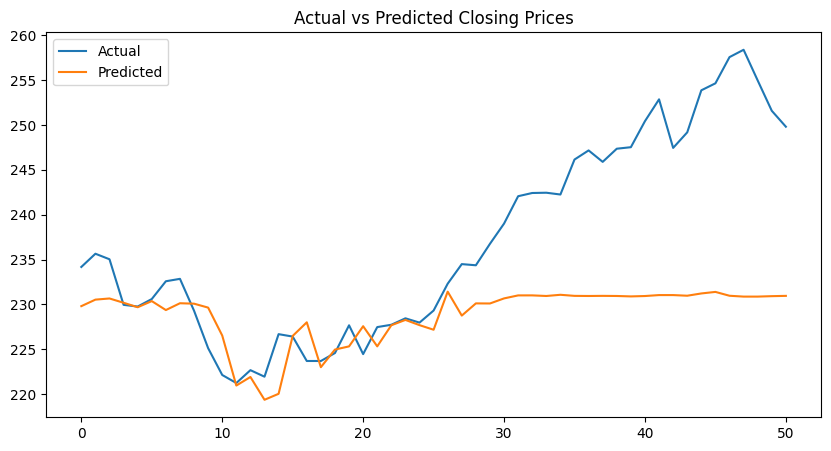

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test_rf.values, label='Actual')
plt.plot(random_forest_predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_rf, random_forest_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rf, random_forest_predictions)

print("Random Forest Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Random Forest Model Performance:
Mean Squared Error = 147.09
Root Mean Squared Error = 12.13
R2 Score = -0.22


After just the first test with using the apple stock with a 1 year difference, the model seems to at first performing not bad, but midway to the end a corresponding flat orange line appear. Wonder if the model actually did it that badly, or I made a mistake somewhere, or cause it is part of the random forest concept in the first place, since unlike a linear regression where it uses a mathematical formula to predict, it uses a decision tree to make its prediction, and it couldn't adapt to the chaotic changes of the stock market.

# Improving Random Forest

Because of how terrible the result of random forest we would need to think of a way to possibly improve it. A possible way to increase its accuracy is too probably give it more information to make it prediction more better i.e. add more features. With some digging we could add SMA, EMA, and RSI to possibly increase its capability.

In [22]:
for _, datasets in dataset.items():
    # Adding SMA (Simple Moving Average)
    datasets['SMA_5'] = datasets['Close'].rolling(window=5).mean()
    datasets['SMA_10'] = datasets['Close'].rolling(window=10).mean()

    # Adding EMA (Exponential Moving Average)
    datasets['EMA_5'] = datasets['Close'].ewm(span=5, adjust=False).mean()
    datasets['EMA_10'] = datasets['Close'].ewm(span=10, adjust=False).mean()

    # Adding RSI (Relative Strength Index)
    delta = datasets['Close'].diff()
    avg_gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    avg_loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = avg_gain / avg_loss
    datasets['RSI'] = 100 - (100 / (1 + rs))
    datasets.dropna(inplace=True)

dataset['AppleStock_Year1'].head()

,Date,Close,High,Low,Open,Volume,Target,SMA_5,SMA_10,EMA_5,EMA_10,RSI
13,2024-01-22,192.480438,193.909972,190.862283,190.902001,60133900,193.761063,186.710693,185.520409,188.315401,186.374688,66.056832
14,2024-01-23,193.761063,194.326926,192.420886,193.602237,42355600,193.086014,189.003897,186.475415,190.130622,187.717665,67.679765
15,2024-01-24,193.086014,194.952351,192.927173,193.999324,53631300,192.758423,191.350714,187.404611,191.115752,188.693729,69.508974
16,2024-01-25,192.758423,194.843162,191.706131,193.800793,54822100,191.021133,192.450662,188.196811,191.663309,189.432764,75.267970
17,2024-01-26,191.021133,193.344118,190.544627,192.857690,44594000,190.336136,192.621414,188.874847,191.449251,189.721558,72.230998


Term Explanation:
- SMA (Simple Moving Average) = Gives the average closing price over the past given days, can be 5, 10, etc.
- EMA (Exponential Moving Average) = A type of moving average which can be said like an extension of SMA, it gives more weight to recent stock prices.
- RSI (Relative Strength Index) = A momentum oscillator that measures how fast and how mcuh the prives move.

In [23]:
features = dataset['AppleStock_Year1'][['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_5', 'SMA_10', 'EMA_5', 'EMA_10', 'RSI']]
stock_target = dataset['AppleStock_Year1']['Target']

x_train_rf, x_test_rf, y_train_rf, y_test_rf = train_test_split(features, stock_target, test_size=0.2, shuffle=False)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(x_train_rf, y_train_rf)

random_forest_predictions = random_forest_model.predict(x_test_rf)

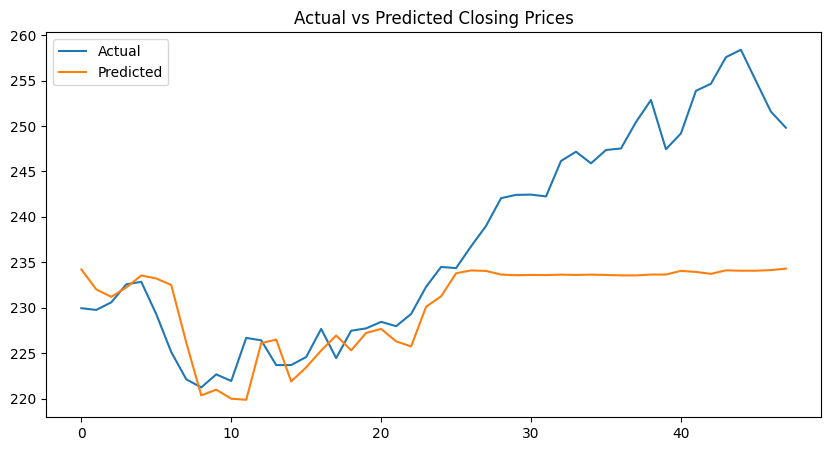

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_rf.values, label='Actual')
plt.plot(random_forest_predictions, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Closing Prices")
plt.show()

In [25]:
mse = mean_squared_error(y_test_rf, random_forest_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_rf, random_forest_predictions)

print("Random Forest Model Performance:")
print(f"Mean Squared Error = {mse:.2f}")
print(f"Root Mean Squared Error = {rmse:.2f}")
print(f"R2 Score = {r2:.2f}")

Random Forest Model Performance:
Mean Squared Error = 113.87
Root Mean Squared Error = 10.67
R2 Score = 0.11


Using the same company stock but with a more added features did seem to increase the random forest accuracy, however it didn't seem to have that much of a significant increase. Further testing with other stock company needed.